# Case Study: Modelling


## 01 Project Description

Lending Bank wants to attract term deposits to fund its lending business. In a term deposit, a client agrees to deposit funds and allow the bank to use them for a fixed length of time. In return, the bank will pay interest on the deposit.

The bank’s sales manager wants to market the product to their existing clients. They have historical information from a previous marketing campaign that includes client demographics, prior call experience, market conditions and the interest rate offered.

Using machine learning, help the bank predict which clients are likely to subscribe to a new term deposit. Explain how different features affect the decision.

**Problem**

Perform an analysis of the given data to determine how different features are related to credit card eligibility. Build a machine learning model that can predict the subs_deposit.

## 02 Data Preparation

In [1]:
import numpy as np
import pandas as pd
data_filepath = '../data/processed/df_data.csv'
# Read just the fist 10 rows to understand the sample values.
df_preview = pd.read_csv(data_filepath, nrows=10)
display(df_preview.head())

client_id  age_bracket  job  marital  education  has_housing_loan  \
0      41020            3    1        3          1                 1   
1      23720            4    4        3          2                 0   
2      29378            3    1        1          1                 0   
3      36636            2    3        2          3                 1   
4      38229            1    1        2          1                 0   

   has_personal_loan  prev_call_duration  days_since_last_call  \
0                  0               283.0                     3   
1                  1               169.0                     6   
2                  0               552.0                    -1   
3                  1               206.0                    -1   
4                  0               341.0                    -1   

   num_contacts_prev  poutcome contact_date     cpi  subs_deposit  \
0                  1         1   2018-07-09  92.379             1   
1                  2         1   2018-05-07  94.215             1   
2                  0         2   2018-01-08  93.444             1   
3                  0         2   2018-02-11  93.200             0   
4                  0         2   2018-04-04  93.075             1   

   contact_month  contact_day  contact_week  contact_weekday  
0              7            9            28                1  
1              5            7            19                1  
2              1            8             2                1  
3              2           11             6                7  
4              4            4            14                3

In [2]:
df_preview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             10 non-null     int64  
 1   age_bracket           10 non-null     int64  
 2   job                   10 non-null     int64  
 3   marital               10 non-null     int64  
 4   education             10 non-null     int64  
 5   has_housing_loan      10 non-null     int64  
 6   has_personal_loan     10 non-null     int64  
 7   prev_call_duration    10 non-null     float64
 8   days_since_last_call  10 non-null     int64  
 9   num_contacts_prev     10 non-null     int64  
 10  poutcome              10 non-null     int64  
 11  contact_date          10 non-null     object 
 12  cpi                   10 non-null     float64
 13  subs_deposit          10 non-null     int64  
 14  contact_month         10 non-null     int64  
 15  contact_day           10 n

In [3]:
column_names = list(df_preview.columns.values)
column_names  # just to make it easier to copy and paste in the next cell.

['client_id',
 'age_bracket',
 'job',
 'marital',
 'education',
 'has_housing_loan',
 'has_personal_loan',
 'prev_call_duration',
 'days_since_last_call',
 'num_contacts_prev',
 'poutcome',
 'contact_date',
 'cpi',
 'subs_deposit',
 'contact_month',
 'contact_day',
 'contact_week',
 'contact_weekday']

In [4]:
sample_type = {
    'client_id':'string',
    'age_bracket': 'int',
    'job': 'int',
    'marital': 'int',
    'education': 'int',
    'has_housing_loan': 'int',
    'has_personal_loan': 'int',
    'prev_call_duration': 'int', 
    'days_since_last_call': 'int',   
    'num_contacts_prev': 'int',   
    'poutcome': 'int',
    'cpi': 'float',
    'subs_deposit':'int', 
    'contact_weekday': 'int',  
     'contact_month':'int',
 'contact_day':'int',
 'contact_week':'int',
}

In [5]:
df_data = pd.read_csv(
    data_filepath,
    index_col=['client_id'],
    dtype=sample_type,
)
display(df_data.head())

age_bracket  job  marital  education  has_housing_loan  \
client_id                                                           
41020                3    1        3          1                 1   
23720                4    4        3          2                 0   
29378                3    1        1          1                 0   
36636                2    3        2          3                 1   
38229                1    1        2          1                 0   

           has_personal_loan  prev_call_duration  days_since_last_call  \
client_id                                                                
41020                      0                 283                     3   
23720                      1                 169                     6   
29378                      0                 552                    -1   
36636                      1                 206                    -1   
38229                      0                 341                    -1   

           num_contacts_prev  poutcome contact_date     cpi  subs_deposit  \
client_id                                                                   
41020                      1         1   2018-07-09  92.379             1   
23720                      2         1   2018-05-07  94.215             1   
29378                      0         2   2018-01-08  93.444             1   
36636                      0         2   2018-02-11  93.200             0   
38229                      0         2   2018-04-04  93.075             1   

           contact_month  contact_day  contact_week  contact_weekday  
client_id                                                             
41020                  7            9            28                1  
23720                  5            7            19                1  
29378                  1            8             2                1  
36636                  2           11             6                7  
38229                  4            4            14                3

In [18]:
df_data.head().T

client_id                  41020       23720       29378       36636  \
age_bracket                    3           4           3           2   
job                            1           4           1           3   
marital                        3           3           1           2   
education                      1           2           1           3   
has_housing_loan               1           0           0           1   
has_personal_loan              0           1           0           1   
prev_call_duration           283         169         552         206   
days_since_last_call           3           6          -1          -1   
num_contacts_prev              1           2           0           0   
poutcome                       1           1           2           2   
contact_date          2018-07-09  2018-05-07  2018-01-08  2018-02-11   
cpi                       92.379      94.215      93.444        93.2   
subs_deposit                   1           1           1           0   
contact_month                  7           5           1           2   
contact_day                    9           7           8          11   
contact_week                  28          19           2           6   
contact_weekday                1           1           1           7   

client_id                  38229  
age_bracket                    1  
job                            1  
marital                        2  
education                      1  
has_housing_loan               0  
has_personal_loan              0  
prev_call_duration           341  
days_since_last_call          -1  
num_contacts_prev              0  
poutcome                       2  
contact_date          2018-04-04  
cpi                       93.075  
subs_deposit                   1  
contact_month                  4  
contact_day                    4  
contact_week                  14  
contact_weekday                3

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 41020 to 40631
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age_bracket           4000 non-null   int64  
 1   job                   4000 non-null   int64  
 2   marital               4000 non-null   int64  
 3   education             4000 non-null   int64  
 4   has_housing_loan      4000 non-null   int64  
 5   has_personal_loan     4000 non-null   int64  
 6   prev_call_duration    4000 non-null   int64  
 7   days_since_last_call  4000 non-null   int64  
 8   num_contacts_prev     4000 non-null   int64  
 9   poutcome              4000 non-null   int64  
 10  contact_date          4000 non-null   object 
 11  cpi                   4000 non-null   float64
 12  subs_deposit          4000 non-null   int64  
 13  contact_month         4000 non-null   int64  
 14  contact_day           4000 non-null   int64  
 15  contact_week         

In [8]:
df_data.describe(include='all').T

count unique         top freq       mean         std  \
age_bracket           4000.0    NaN         NaN  NaN     2.4225    0.625773   
job                   4000.0    NaN         NaN  NaN    2.70675    1.689369   
marital               4000.0    NaN         NaN  NaN      1.521    0.694752   
education             4000.0    NaN         NaN  NaN     2.3065    1.178094   
has_housing_loan      4000.0    NaN         NaN  NaN    0.57475    0.538967   
has_personal_loan     4000.0    NaN         NaN  NaN    0.18925    0.446637   
prev_call_duration    4000.0    NaN         NaN  NaN  354.31575  348.448736   
days_since_last_call  4000.0    NaN         NaN  NaN   -0.34925    2.311517   
num_contacts_prev     4000.0    NaN         NaN  NaN      0.272    0.643132   
poutcome              4000.0    NaN         NaN  NaN        1.7    0.647769   
contact_date            4000     50  2018-02-05  244        NaN         NaN   
cpi                   4000.0    NaN         NaN  NaN  93.503644    0.625715   
subs_deposit          4000.0    NaN         NaN  NaN     0.3975    0.489442   
contact_month         4000.0    NaN         NaN  NaN    3.87125     2.00616   
contact_day           4000.0    NaN         NaN  NaN    6.69575    2.163759   
contact_week          4000.0    NaN         NaN  NaN   13.76075    8.629347   
contact_weekday       4000.0    NaN         NaN  NaN     3.8255    1.946535   

                         min     25%     50%     75%     max  
age_bracket              1.0     2.0     2.0     3.0     4.0  
job                      1.0     1.0     2.0     4.0     7.0  
marital                  1.0     1.0     1.0     2.0     4.0  
education                1.0     1.0     2.0     3.0     6.0  
has_housing_loan         0.0     0.0     1.0     1.0     2.0  
has_personal_loan        0.0     0.0     0.0     0.0     2.0  
prev_call_duration       2.0   131.0   237.0   461.0  4199.0  
days_since_last_call    -1.0    -1.0    -1.0    -1.0    27.0  
num_contacts_prev        0.0     0.0     0.0     0.0     6.0  
poutcome                 0.0     2.0     2.0     2.0     2.0  
contact_date             NaN     NaN     NaN     NaN     NaN  
cpi                   92.201  92.963  93.444  93.994  94.767  
subs_deposit             0.0     0.0     0.0     1.0     1.0  
contact_month            1.0     2.0     4.0     6.0     7.0  
contact_day              3.0     5.0     6.0     8.0    12.0  
contact_week             1.0     6.0    14.0    23.0    28.0  
contact_weekday          1.0     3.0     4.0     5.0     7.0

## 03 Modeling and Evaluation

### 03.1 Basic Modeling  -  Decision Tree

Due the fact most of the feature are categorical, we will use Decision Tree to model the data.

The trade-off between the accuracy and the complexity of the model is the following:
- cpi and prev_call_duration are used.
- the 'subs_deposit' feature is the target feature.

##### Decision Tree Using All the Features

In [9]:
### Clean the data for DTree model
df_clean = df_data.copy()
# df_clean.drop(['cpi'], axis=1, inplace=True)
# df_clean.drop(['prev_call_duration'], axis=1, inplace=True)
df_clean.drop(['contact_date'], axis=1, inplace=True)

In [19]:
df_clean.head().T

client_id               41020    23720    29378  36636    38229
age_bracket             3.000    4.000    3.000    2.0    1.000
job                     1.000    4.000    1.000    3.0    1.000
marital                 3.000    3.000    1.000    2.0    2.000
education               1.000    2.000    1.000    3.0    1.000
has_housing_loan        1.000    0.000    0.000    1.0    0.000
has_personal_loan       0.000    1.000    0.000    1.0    0.000
prev_call_duration    283.000  169.000  552.000  206.0  341.000
days_since_last_call    3.000    6.000   -1.000   -1.0   -1.000
num_contacts_prev       1.000    2.000    0.000    0.0    0.000
poutcome                1.000    1.000    2.000    2.0    2.000
cpi                    92.379   94.215   93.444   93.2   93.075
subs_deposit            1.000    1.000    1.000    0.0    1.000
contact_month           7.000    5.000    1.000    2.0    4.000
contact_day             9.000    7.000    8.000   11.0    4.000
contact_week           28.000   19.000    2.000    6.0   14.000
contact_weekday         1.000    1.000    1.000    7.0    3.000

In [10]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

random_state_seed = 2022 # for reproducibility

data = df_clean.drop(['subs_deposit'], axis=1).values
target = df_clean['subs_deposit'].values
print(data.shape, target.shape)


(4000, 15) (4000,)


In [12]:
score_list = []
dt_depth_list = []
cv_score_ave = []
for dt_depth in range(1,25+1):
    model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                    max_depth=dt_depth)
    score = cross_val_score(model_DT, data, target, cv=10)
    score_list.append(score)
    dt_depth_list.append(dt_depth)
    cv_score_ave.append(score.mean())


In [13]:
score_mat = np.stack(score_list, axis=0)
df_score = pd.DataFrame(score_mat,
                        columns=['cv' + str(x) for x in range(1, 10 + 1)])

df_score
df_cv_score = pd.DataFrame({
    'depth': dt_depth_list,
    'cv_score_ave': cv_score_ave,
})
df_cv_score = pd.concat([df_cv_score, df_score], axis=1)
# df_cv_score
df_cv_score.to_csv('../reports/df_cv_score_DT.csv')

In [14]:
df_cv_score

depth  cv_score_ave     cv1     cv2     cv3     cv4     cv5     cv6  \
0       1       0.74675  0.7750  0.7675  0.7625  0.7425  0.7300  0.7800   
1       2       0.77900  0.8075  0.8100  0.7850  0.7750  0.7875  0.7925   
2       3       0.80375  0.8125  0.8325  0.8275  0.8150  0.8475  0.7975   
3       4       0.82425  0.8400  0.8525  0.8300  0.8350  0.8475  0.8525   
4       5       0.83350  0.8450  0.8575  0.8300  0.8650  0.8700  0.8525   
5       6       0.83775  0.8600  0.8725  0.8300  0.8425  0.8675  0.8600   
6       7       0.84125  0.8600  0.8675  0.8425  0.8550  0.8575  0.8625   
7       8       0.84750  0.8375  0.8625  0.8550  0.8650  0.8725  0.8700   
8       9       0.84425  0.8600  0.8625  0.8300  0.8575  0.8700  0.8575   
9      10       0.84225  0.8525  0.8750  0.8325  0.8675  0.8675  0.8625   
10     11       0.84400  0.8575  0.8950  0.8500  0.8650  0.8575  0.8375   
11     12       0.82975  0.8425  0.8625  0.8375  0.8575  0.8450  0.8300   
12     13       0.83125  0.8300  0.8700  0.8475  0.8550  0.8600  0.8250   
13     14       0.82825  0.8475  0.8750  0.8325  0.8500  0.8600  0.8075   
14     15       0.82300  0.8500  0.8675  0.8375  0.8425  0.8425  0.8100   
15     16       0.82100  0.8475  0.8650  0.8275  0.8475  0.8375  0.7925   
16     17       0.81950  0.8300  0.8550  0.8275  0.8450  0.8400  0.7975   
17     18       0.81825  0.8450  0.8550  0.8325  0.8475  0.8450  0.8000   
18     19       0.82375  0.8450  0.8600  0.8300  0.8475  0.8500  0.8150   
19     20       0.82050  0.8450  0.8700  0.8225  0.8400  0.8475  0.8000   
20     21       0.81900  0.8450  0.8700  0.8250  0.8400  0.8375  0.8000   
21     22       0.82025  0.8450  0.8700  0.8250  0.8400  0.8500  0.8000   
22     23       0.82025  0.8450  0.8700  0.8250  0.8400  0.8500  0.8000   
23     24       0.82025  0.8450  0.8700  0.8250  0.8400  0.8500  0.8000   
24     25       0.82025  0.8450  0.8700  0.8250  0.8400  0.8500  0.8000   

       cv7     cv8     cv9    cv10  
0   0.7650  0.7425  0.7150  0.6875  
1   0.7925  0.7825  0.7350  0.7225  
2   0.7800  0.8050  0.7775  0.7425  
3   0.7975  0.8350  0.7875  0.7650  
4   0.8175  0.8350  0.7900  0.7725  
5   0.8225  0.8450  0.8125  0.7650  
6   0.8375  0.8400  0.8025  0.7875  
7   0.8500  0.8475  0.8050  0.8100  
8   0.8425  0.8400  0.8025  0.8200  
9   0.8325  0.8350  0.7925  0.8050  
10  0.8425  0.8225  0.8050  0.8075  
11  0.8350  0.8200  0.7800  0.7875  
12  0.8275  0.8225  0.7875  0.7875  
13  0.8325  0.8100  0.7900  0.7775  
14  0.8225  0.8000  0.7750  0.7825  
15  0.8250  0.8050  0.7700  0.7925  
16  0.8200  0.8050  0.7750  0.8000  
17  0.8075  0.8050  0.7750  0.7700  
18  0.8225  0.8100  0.7650  0.7925  
19  0.8200  0.8125  0.7700  0.7775  
20  0.8150  0.8100  0.7700  0.7775  
21  0.8150  0.8100  0.7700  0.7775  
22  0.8150  0.8100  0.7700  0.7775  
23  0.8150  0.8100  0.7700  0.7775  
24  0.8150  0.8100  0.7700  0.7775

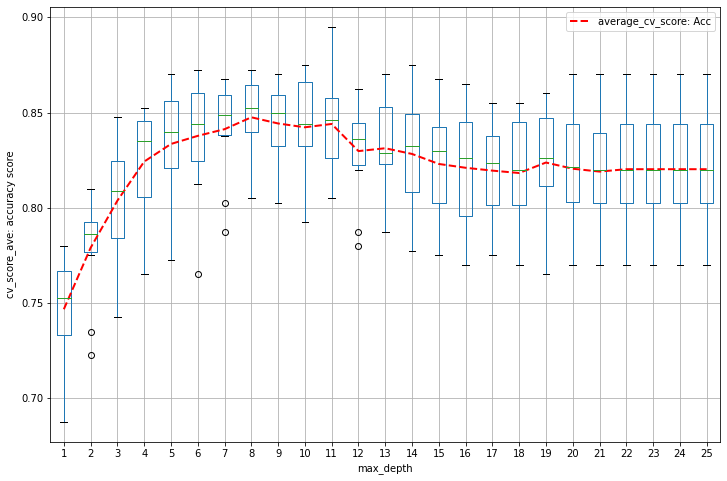

In [15]:
ax = df_score.T.boxplot(figsize=(12, 8))
ax.plot(dt_depth_list, cv_score_ave, 'r--', linewidth=2, label='average_cv_score: Acc')
# ax.xtick(dt_depth_list)
ax.set_xticklabels(dt_depth_list)
ax.set_xlabel('max_depth')
ax.set_ylabel('cv_score_ave: accuracy score')
ax.legend()
# ax.set_ylim([0, 1])
plt.show()

In [24]:
np.power(2,8)

256

In [16]:
feature_names = list(df_clean.columns.values)
feature_names.remove('subs_deposit')
print(feature_names)
 

['age_bracket', 'job', 'marital', 'education', 'has_housing_loan', 'has_personal_loan', 'prev_call_duration', 'days_since_last_call', 'num_contacts_prev', 'poutcome', 'cpi', 'contact_month', 'contact_day', 'contact_week', 'contact_weekday']


In [20]:
best_depth = df_cv_score[df_cv_score.cv_score_ave == df_cv_score.cv_score_ave.max()].depth.values[0]
best_depth

8

In [25]:
from sklearn import tree
from sklearn import metrics


# model one half depth 
model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                  max_depth=best_depth/2,
                                  criterion='gini')
model_DT.fit(data, target)

y_pred = model_DT.predict(data)
y_prob = model_DT.predict_proba(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))

# model one full depth
model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                  max_depth=best_depth,
                                  criterion='gini')
model_DT.fit(data, target)

y_pred = model_DT.predict(data)
y_prob = model_DT.predict_proba(data)


accuracy: 0.837
balanced_accuracy_score: 0.8251415746757483
roc_auc_score: 0.8251415746757483
recall_score: 0.7672955974842768
f1_score: 0.7891332470892626
[[2128  282]
 [ 370 1220]]
accuracy: 0.90075
balanced_accuracy_score: 0.8970915211774837
roc_auc_score: 0.8970915211774838
recall_score: 0.879245283018868
f1_score: 0.875665518321328
[[2205  205]
 [ 192 1398]]


In [30]:
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('precision_score:', metrics.precision_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))

accuracy: 0.90075
balanced_accuracy_score: 0.8970915211774837
roc_auc_score: 0.8970915211774838
recall_score: 0.879245283018868
precision_score: 0.8721147847785402
f1_score: 0.875665518321328
[[2205  205]
 [ 192 1398]]


In [55]:
from joblib import dump, load
dump(model_DT, '../models/model_DT.joblib')


['../models/model_DT.joblib']

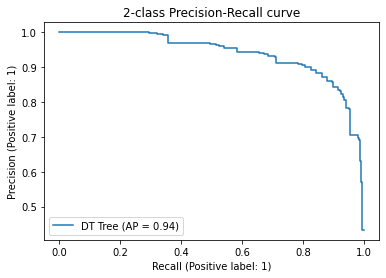

In [26]:
from sklearn.metrics import PrecisionRecallDisplay
# display = PrecisionRecallDisplay.from_predictions(target,
#                                                   y_prob[:, 1],
#                                                   name="DT Tree")
# _ = display.ax_.set_title("2-class Precision-Recall curve")
PR_display = PrecisionRecallDisplay.from_estimator(model_DT,
                                                data,
                                                target,
                                                name="DT Tree")
_ = PR_display.ax_.set_title("2-class Precision-Recall curve")

##### Test the sample data with pre-trained model

In [28]:
model_DT_reloaded = load('../models/model_DT.joblib')

In [29]:
df_clean.head()

age_bracket  job  marital  education  has_housing_loan  \
client_id                                                           
41020                3    1        3          1                 1   
23720                4    4        3          2                 0   
29378                3    1        1          1                 0   
36636                2    3        2          3                 1   
38229                1    1        2          1                 0   

           has_personal_loan  prev_call_duration  days_since_last_call  \
client_id                                                                
41020                      0                 283                     3   
23720                      1                 169                     6   
29378                      0                 552                    -1   
36636                      1                 206                    -1   
38229                      0                 341                    -1   

           num_contacts_prev  poutcome     cpi  subs_deposit  contact_month  \
client_id                                                                     
41020                      1         1  92.379             1              7   
23720                      2         1  94.215             1              5   
29378                      0         2  93.444             1              1   
36636                      0         2  93.200             0              2   
38229                      0         2  93.075             1              4   

           contact_day  contact_week  contact_weekday  
client_id                                              
41020                9            28                1  
23720                7            19                1  
29378                8             2                1  
36636               11             6                7  
38229                4            14                3

In [30]:
sample = df_clean[df_clean.index == '41020']


In [31]:
sample.columns

Index(['age_bracket', 'job', 'marital', 'education', 'has_housing_loan',
       'has_personal_loan', 'prev_call_duration', 'days_since_last_call',
       'num_contacts_prev', 'poutcome', 'cpi', 'subs_deposit', 'contact_month',
       'contact_day', 'contact_week', 'contact_weekday'],
      dtype='object')

In [32]:
# one sample test
xt = sample.drop(columns='subs_deposit').values  # feature
yt = sample.subs_deposit.values[0]
# xt, yt
y_pred = model_DT_reloaded.predict(xt)
y_prob = model_DT_reloaded.predict_proba(xt)  # probability

xt, yt, y_pred[0], y_prob[0, 1]


(array([[  3.   ,   1.   ,   3.   ,   1.   ,   1.   ,   0.   , 283.   ,
           3.   ,   1.   ,   1.   ,  92.379,   7.   ,   9.   ,  28.   ,
           1.   ]]),
 1,
 1,
 1.0)

In [33]:
sample

age_bracket  job  marital  education  has_housing_loan  \
client_id                                                           
41020                3    1        3          1                 1   

           has_personal_loan  prev_call_duration  days_since_last_call  \
client_id                                                                
41020                      0                 283                     3   

           num_contacts_prev  poutcome     cpi  subs_deposit  contact_month  \
client_id                                                                     
41020                      1         1  92.379             1              7   

           contact_day  contact_week  contact_weekday  
client_id                                              
41020                9            28                1

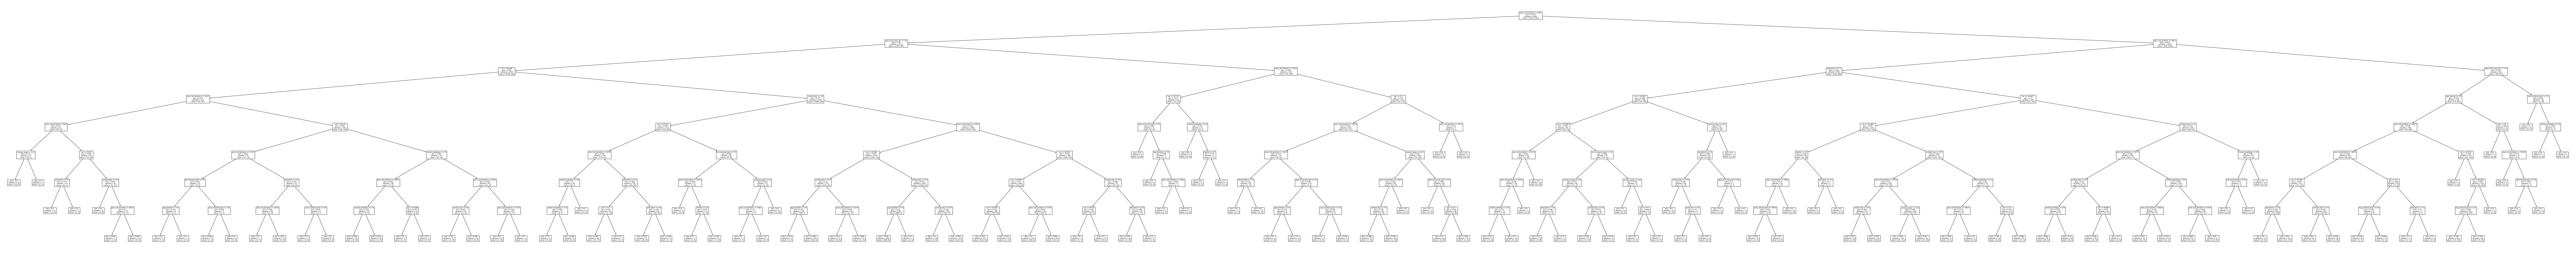

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(200, 20
), dpi=100)
tree.plot_tree(model_DT, feature_names=feature_names)
plt.show()

This basic model tell us, that only based on feature of  num_contacts_prev, age_bracket, and job.

We can boost the prediction accuracy from 50% (of random guessing) to 90%.


Thus, we will call this as our baseline ACC. 

```
accuracy: 0.8584392014519057
balanced_accuracy_score: 0.843555369361821
roc_auc_score: 0.843555369361821
recall_score: 0.780952380952381

```

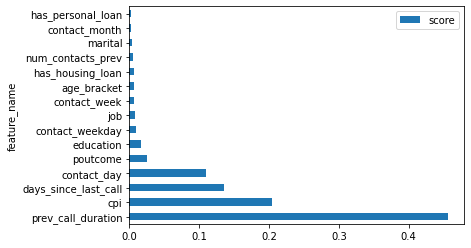

feature_name     score  cum_score
6     prev_call_duration  0.456702   0.456702
10                   cpi  0.203711   0.660413
7   days_since_last_call  0.135679   0.796092
12           contact_day  0.109316   0.905408
9               poutcome  0.025332   0.930740
3              education  0.017270   0.948010
14       contact_weekday  0.010060   0.958070
1                    job  0.008742   0.966812
13          contact_week  0.007210   0.974022
0            age_bracket  0.006924   0.980946
4       has_housing_loan  0.006278   0.987224
8      num_contacts_prev  0.005675   0.992900
2                marital  0.003343   0.996243
11         contact_month  0.001976   0.998218
5      has_personal_loan  0.001782   1.000000

In [31]:
df_feature_importances = pd.DataFrame({'feature_name': feature_names, 'score':model_DT.feature_importances_})
df_feature_importances.sort_values(by='score', ascending=False, inplace=True)

df_feature_importances['cum_score'] = df_feature_importances.score.cumsum()
ax = df_feature_importances.plot.barh(x='feature_name', y='score')
plt.show()
display(df_feature_importances)

##### Decision Tree Using Part of the Features

Base on the above result, we will use the following features:
- prev_call_duration, cpi, days_since_last_call, poutcome, contact_weekday, num_contacts_prev, takes about 98% percent of the importance. What they have in common is that they are all from the Bank’s previous marketing campaign or previous call history.
- education, age_bracket, has_housing_loan, marital, job has_personal_loan are only 2% percent of the importance. And all these features are from Client’s demographic information.

**Question** What if we use all the 'not-important' features to do the modelling? what will happen?

In [35]:
df_clean = df_data.copy()
df_clean.drop(['prev_call_duration'], axis=1, inplace=True)
df_clean.drop(['cpi'], axis=1, inplace=True)
df_clean.drop(['days_since_last_call'], axis=1, inplace=True)
df_clean.drop(['contact_day'], axis=1, inplace=True)
df_clean.drop(['contact_date'], axis=1, inplace=True)


data = df_clean.drop(['subs_deposit'], axis=1).values
target = df_clean['subs_deposit'].values
print(data.shape, target.shape)


(4000, 11) (4000,)


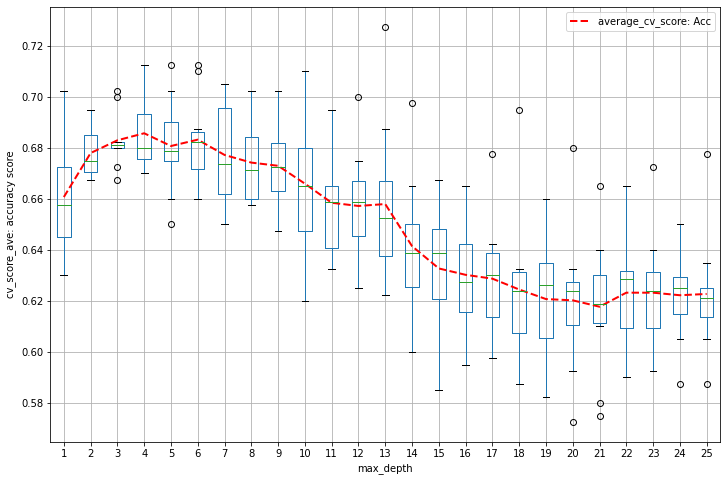

4


In [36]:
# same cross validation to find the best max_depth
score_list = []
dt_depth_list = []
cv_score_ave = []
for dt_depth in range(1, 25 + 1):
    model_DT = DecisionTreeClassifier(random_state=random_state_seed,
                                      max_depth=dt_depth)
    score = cross_val_score(model_DT, data, target, cv=10)
    score_list.append(score)
    dt_depth_list.append(dt_depth)
    cv_score_ave.append(score.mean())
score_mat = np.stack(score_list, axis=0)
df_score = pd.DataFrame(score_mat,
                        columns=['cv' + str(x) for x in range(1, 10 + 1)])

df_score
df_cv_score = pd.DataFrame({
    'depth': dt_depth_list,
    'cv_score_ave': cv_score_ave,
})
df_cv_score = pd.concat([df_cv_score, df_score], axis=1)
# df_cv_score
ax = df_score.T.boxplot(figsize=(12, 8))
ax.plot(dt_depth_list,
        cv_score_ave,
        'r--',
        linewidth=2,
        label='average_cv_score: Acc')
# ax.xtick(dt_depth_list)
ax.set_xticklabels(dt_depth_list)
ax.set_xlabel('max_depth')
ax.set_ylabel('cv_score_ave: accuracy score')
ax.legend()
# ax.set_ylim([0, 1])
plt.show()
best_depth = df_cv_score[df_cv_score.cv_score_ave ==
                         df_cv_score.cv_score_ave.max()].depth.values[0]
print(f'{best_depth:}')

In [37]:
model_DT_weak = DecisionTreeClassifier(random_state=random_state_seed,
                                  max_depth=best_depth,
                                  criterion='gini')
model_DT_weak.fit(data, target)

y_pred = model_DT_weak.predict(data)
y_prob = model_DT_weak.predict_proba(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))

accuracy: 0.69225
balanced_accuracy_score: 0.625625668728307
roc_auc_score: 0.625625668728307
recall_score: 0.30062893081761005
f1_score: 0.4371284865112025
[[2291  119]
 [1112  478]]


In [38]:
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('precision_score:', metrics.precision_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))

accuracy: 0.69225
balanced_accuracy_score: 0.625625668728307
roc_auc_score: 0.625625668728307
recall_score: 0.30062893081761005
precision_score: 0.8006700167504187
f1_score: 0.4371284865112025
[[2291  119]
 [1112  478]]


#### Receiver Operating Characteristic (ROC) with cross validation

In [41]:
best_depth =8

(4000, 15) (4000,)


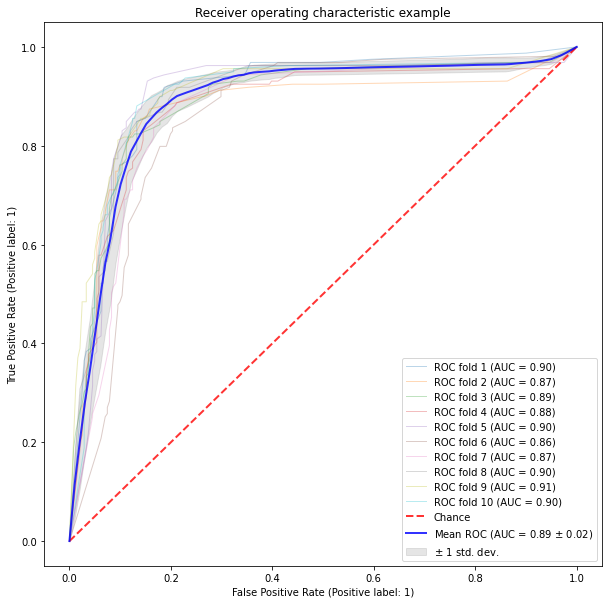

In [42]:
# Run classifier with cross-validation and plot ROC curves
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import StratifiedKFold

df_clean = df_data.copy()
df_clean.drop(['contact_date'], axis=1, inplace=True)

data = df_clean.drop(['subs_deposit'], axis=1).values
target = df_clean['subs_deposit'].values
print(data.shape, target.shape)

X = data
y = target

cv = StratifiedKFold(n_splits=10, shuffle= True, random_state = random_state_seed)

# classifier = svm.SVC(kernel="linear",
#                      probability=True,
#                      random_state=random_state_seed)

classifier = DecisionTreeClassifier(random_state=random_state_seed, max_depth=best_depth, criterion='gini')

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(10, 10))
for i, (train, test) in enumerate(cv.split(X, y)):
    classifier.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        classifier,
        X[test],
        y[test],
        name="ROC fold {}".format(i+1),
        alpha=0.3,
        lw=1,
        ax=ax,
    )
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1],
        linestyle="--",
        lw=2,
        color="r",
        label="Chance",
        alpha=0.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    title="Receiver operating characteristic example",
)
ax.legend(loc="lower right")
plt.show()


### 03.2 Ensemble Modelling  - Random Forest

In [45]:
list(x for x in range(10, 100+1, 10))

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [43]:
best_depth

8

In [50]:
from sklearn.ensemble import RandomForestClassifier

df_clean = df_data.copy()
df_clean.drop(['contact_date'], axis=1, inplace=True)
data = df_clean.drop(['subs_deposit'], axis=1).values
target = df_clean['subs_deposit'].values
print(data.shape, target.shape)

def Search_RF_Depth(n_estimators_max=100):
    score_list = []
    tree_num_list = []
    cv_score_ave = []
    for n in range(1, n_estimators_max+1):
        model_RF = RandomForestClassifier(n_estimators=n,
                                        random_state=random_state_seed,
                                        max_depth=best_depth)
        score = cross_val_score(model_RF, data, target, cv=10)
        score_list.append(score)
        tree_num_list.append(n)
        cv_score_ave.append(score.mean())
    score_mat = np.stack(score_list, axis=0)
    df_score = pd.DataFrame(score_mat,
                            columns=['cv' + str(x) for x in range(1, 10+1)])

    # df_score
    df_cv_score = pd.DataFrame({
        'depth': tree_num_list,
        'cv_score_ave': cv_score_ave,
    })
    df_cv_score = pd.concat([df_cv_score, df_score], axis=1)
    # df_cv_score
    df_cv_score.to_csv('../reports/df_cv_score_RF.csv')

    ax = df_score.T.boxplot(figsize=(20, 8))
    ax.plot(tree_num_list,
            cv_score_ave,
            'r--',
            linewidth=2,
            label='average_cv_score: Acc')
    # ax.xtick(tree_num_list)
    ax.set_xticklabels(tree_num_list)
    ax.set_xlabel('max_number_of_trees')
    ax.set_ylabel('cv_score_ave: accuracy score')
    ax.legend()
    # ax.set_ylim([0, 1])
    plt.show()
    return df_cv_score

df_cv_score = Search_RF_Depth(n_estimators_max=100)

(4000, 15) (4000,)


In [51]:
best_n = df_cv_score[df_cv_score['cv_score_ave'] == df_cv_score['cv_score_ave'].max()].depth.values[0]
best_n

97

In [52]:
best_depth

8

In [53]:
best_n = 20
best_depth = 8

In [59]:
model_RF = RandomForestClassifier(n_estimators=best_n,
                                  random_state=random_state_seed,
                                  max_depth=best_depth)
model_RF.fit(data, target)

y_pred = model_RF.predict(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('precision_score:', metrics.precision_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))
dump(model_RF, '../models/model_RF.joblib')

accuracy: 0.89225
balanced_accuracy_score: 0.8883256348025783
roc_auc_score: 0.8883256348025783
recall_score: 0.869182389937107
precision_score: 0.8610591900311526
f1_score: 0.8651017214397495
[[2187  223]
 [ 208 1382]]


['../models/model_RF.joblib']

In [58]:
model_RF = RandomForestClassifier(n_estimators=best_n*2,
                                  random_state=random_state_seed,
                                  max_depth=best_depth)
model_RF.fit(data, target)

y_pred = model_RF.predict(data)
print('accuracy:', metrics.accuracy_score(target, y_pred))
print('balanced_accuracy_score:',
      metrics.balanced_accuracy_score(target, y_pred))
print('roc_auc_score:', metrics.roc_auc_score(target, y_pred))
print('recall_score:', metrics.recall_score(target, y_pred))
print('f1_score:', metrics.f1_score(target, y_pred))
print(metrics.confusion_matrix(target, y_pred))
dump(model_RF, '../models/model_RF100.joblib')

accuracy: 0.89025
balanced_accuracy_score: 0.8859169080612751
roc_auc_score: 0.885916908061275
recall_score: 0.8647798742138365
f1_score: 0.8623392913138915
[[2186  224]
 [ 215 1375]]


['../models/model_RF100.joblib']

In [60]:
PR_display = PrecisionRecallDisplay.from_estimator(model_RF,
                                                   data,
                                                   target,
                                                   name="Random Forest")
_ = PR_display.ax_.set_title("2-class Precision-Recall curve")

### 03.3 AutoML: autogluon 

In [61]:
df_data.columns.values.tolist() 

['age_bracket',
 'job',
 'marital',
 'education',
 'has_housing_loan',
 'has_personal_loan',
 'prev_call_duration',
 'days_since_last_call',
 'num_contacts_prev',
 'poutcome',
 'contact_date',
 'cpi',
 'subs_deposit',
 'contact_month',
 'contact_day',
 'contact_week',
 'contact_weekday']

In [62]:
df_data.head()

age_bracket  job  marital  education  has_housing_loan  \
client_id                                                           
41020                3    1        3          1                 1   
23720                4    4        3          2                 0   
29378                3    1        1          1                 0   
36636                2    3        2          3                 1   
38229                1    1        2          1                 0   

           has_personal_loan  prev_call_duration  days_since_last_call  \
client_id                                                                
41020                      0                 283                     3   
23720                      1                 169                     6   
29378                      0                 552                    -1   
36636                      1                 206                    -1   
38229                      0                 341                    -1   

           num_contacts_prev  poutcome contact_date     cpi  subs_deposit  \
client_id                                                                   
41020                      1         1   2018-07-09  92.379             1   
23720                      2         1   2018-05-07  94.215             1   
29378                      0         2   2018-01-08  93.444             1   
36636                      0         2   2018-02-11  93.200             0   
38229                      0         2   2018-04-04  93.075             1   

           contact_month  contact_day  contact_week  contact_weekday  
client_id                                                             
41020                  7            9            28                1  
23720                  5            7            19                1  
29378                  1            8             2                1  
36636                  2           11             6                7  
38229                  4            4            14                3

In [71]:
from autogluon.tabular import TabularPredictor

label = 'subs_deposit'
save_path = '../models/agModels-predictClass'  # specifies folder to store trained models

# here we used all the feature.
predictor = TabularPredictor(label=label, path=save_path, eval_metric='f1' ).fit(df_data)


Beginning AutoGluon training ...
AutoGluon will save models to "../models/agModels-predictClass/"
AutoGluon Version:  0.4.0
Python Version:     3.8.10
Operating System:   Darwin
Train Data Rows:    4000
Train Data Columns: 16
Label Column: subs_deposit
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    30112.61 MB
	Train Data (Original)  Memory Usage: 0.75 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify specia

RecursionError: maximum recursion depth exceeded while calling a Python object

In [64]:
results = predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val  pred_time_val  fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2      0.872       0.092714  3.103420                0.001112           0.479608            2       True         14
1              CatBoost      0.862       0.003332  0.710551                0.003332           0.710551            1       True          7
2            LightGBMXT      0.858       0.003318  1.050827                0.003318           1.050827            1       True          3
3               XGBoost      0.858       0.005511  0.486223                0.005511           0.486223            1       True         11
4              LightGBM      0.856       0.002486  0.286773                0.002486           0.286773            1       True          4
5         LightGBMLarge      0.856       0.003893  0.984899                0.003893           0.984899        

/Users/caihaocui/opt/miniconda3/envs/lending_bank_client_ranking/lib/python3.8/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [65]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)

AutoGluon infers problem type is:  binary
AutoGluon identified the following types of features:
('float', [])                :  1 | ['cpi']
('int', [])                  : 14 | ['age_bracket', 'job', 'marital', 'education', 'has_housing_loan', ...]
('int', ['datetime_as_int']) :  4 | ['contact_date', 'contact_date.month', 'contact_date.day', 'contact_date.dayofweek']


In [69]:
df_leaderboard = predictor.leaderboard(df_data, silent=True, extra_metrics=[predictor.eval_metric])


In [70]:
df_leaderboard

model  score_test  accuracy  score_val  pred_time_test  \
0      RandomForestGini     0.97925   0.97925      0.834        0.095564   
1      RandomForestEntr     0.97875   0.97875      0.830        0.089724   
2        ExtraTreesEntr     0.97700   0.97700      0.816        0.119208   
3        ExtraTreesGini     0.97650   0.97650      0.812        0.114621   
4         LightGBMLarge     0.93850   0.93850      0.856        0.010072   
5   WeightedEnsemble_L2     0.93700   0.93700      0.872        0.216085   
6               XGBoost     0.92075   0.92075      0.858        0.011583   
7        NeuralNetTorch     0.89800   0.89800      0.838        0.038991   
8              CatBoost     0.89650   0.89650      0.862        0.009294   
9            LightGBMXT     0.89625   0.89625      0.858        0.016752   
10             LightGBM     0.86525   0.86525      0.856        0.005131   
11      NeuralNetFastAI     0.85325   0.85325      0.856        0.059290   
12       KNeighborsDist     0.62175   0.62175      0.630        0.341385   
13       KNeighborsUnif     0.62100   0.62100      0.626        0.500507   

    pred_time_val  fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0        0.042260  0.460386                 0.095564                0.042260   
1        0.042117  0.467976                 0.089724                0.042117   
2        0.042895  0.429068                 0.119208                0.042895   
3        0.042248  0.419603                 0.114621                0.042248   
4        0.003893  0.984899                 0.010072                0.003893   
5        0.092714  3.103420                 0.011431                0.001112   
6        0.005511  0.486223                 0.011583                0.005511   
7        0.011670  6.768602                 0.038991                0.011670   
8        0.003332  0.710551                 0.009294                0.003332   
9        0.003318  1.050827                 0.016752                0.003318   
10       0.002486  0.286773                 0.005131                0.002486   
11       0.019483  3.534489                 0.059290                0.019483   
12       0.038367  0.006468                 0.341385                0.038367   
13       0.073084  0.005924                 0.500507                0.073084   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            0.460386            1       True          5  
1            0.467976            1       True          6  
2            0.429068            1       True          9  
3            0.419603            1       True          8  
4            0.984899            1       True         13  
5            0.479608            2       True         14  
6            0.486223            1       True         11  
7            6.768602            1       True         12  
8            0.710551            1       True          7  
9            1.050827            1       True          3  
10           0.286773            1       True          4  
11           3.534489            1       True         10  
12           0.006468            1       True          2  
13           0.005924            1       True          1

In [67]:
df_leaderboard.sort_values(by='score_val', ascending=False, inplace=True)
df_leaderboard.reset_index(drop=True, inplace=True)

df_leaderboard.to_csv('../reports/df_leaderboard.csv', index=False)
df_leaderboard

model  score_test  score_val  pred_time_test  pred_time_val  \
0   WeightedEnsemble_L2     0.93700      0.872        0.184274       0.092714   
1              CatBoost     0.89650      0.862        0.003329       0.003332   
2               XGBoost     0.92075      0.858        0.008676       0.005511   
3            LightGBMXT     0.89625      0.858        0.012912       0.003318   
4         LightGBMLarge     0.93850      0.856        0.010502       0.003893   
5              LightGBM     0.86525      0.856        0.003518       0.002486   
6       NeuralNetFastAI     0.85325      0.856        0.053626       0.019483   
7        NeuralNetTorch     0.89800      0.838        0.040194       0.011670   
8      RandomForestGini     0.97925      0.834        0.081089       0.042260   
9      RandomForestEntr     0.97875      0.830        0.078703       0.042117   
10       ExtraTreesEntr     0.97700      0.816        0.092134       0.042895   
11       ExtraTreesGini     0.97650      0.812        0.098748       0.042248   
12       KNeighborsDist     0.62175      0.630        0.341606       0.038367   
13       KNeighborsUnif     0.62100      0.626        0.296612       0.073084   

    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0   3.103420                 0.010651                0.001112   
1   0.710551                 0.003329                0.003332   
2   0.486223                 0.008676                0.005511   
3   1.050827                 0.012912                0.003318   
4   0.984899                 0.010502                0.003893   
5   0.286773                 0.003518                0.002486   
6   3.534489                 0.053626                0.019483   
7   6.768602                 0.040194                0.011670   
8   0.460386                 0.081089                0.042260   
9   0.467976                 0.078703                0.042117   
10  0.429068                 0.092134                0.042895   
11  0.419603                 0.098748                0.042248   
12  0.006468                 0.341606                0.038367   
13  0.005924                 0.296612                0.073084   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            0.479608            2       True         14  
1            0.710551            1       True          7  
2            0.486223            1       True         11  
3            1.050827            1       True          3  
4            0.984899            1       True         13  
5            0.286773            1       True          4  
6            3.534489            1       True         10  
7            6.768602            1       True         12  
8            0.460386            1       True          5  
9            0.467976            1       True          6  
10           0.429068            1       True          9  
11           0.419603            1       True          8  
12           0.006468            1       True          2  
13           0.005924            1       True          1

In [137]:
model_autoML = TabularPredictor.load(
    save_path
)  # unnecessary, just demonstrates how to load previously-trained predictor from file

# print(predictor.get_model_names())

data = df_data.drop(columns='subs_deposit')
target = df_data.subs_deposit 

y_pred = model_autoML.predict(data)
# print("Predictions:  \n", y_pred)
perf = model_autoML.evaluate_predictions(y_true=target,
                                         y_pred=y_pred,
                                         auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.9297381384495722
Evaluations on test data:
{
    "accuracy": 0.9297381384495722,
    "balanced_accuracy": 0.9321273964131107,
    "mcc": 0.8542804504458337,
    "f1": 0.910884577441631,
    "precision": 0.8816040738383195,
    "recall": 0.9421768707482994
}


In [138]:
y_prob = model_autoML.predict_proba(data)
y_prob.head()


0         1
client_id                    
41020      0.039096  0.960904
23720      0.052240  0.947760
29378      0.232793  0.767207
36636      0.937786  0.062214
38229      0.160161  0.839839

In [155]:
x= data.iloc[0, :].to_frame().T

In [157]:
x

age_bracket           job   marital  education has_housing_loan  \
41020       41-60  white-collar  divorced  bachelors              yes   

      has_personal_loan prev_call_duration days_since_last_call  \
41020                no                283                    3   

      num_contacts_prev poutcome contact_date     cpi  
41020                 1  success   2018-07-09  92.379

In [169]:
y_pred = model_autoML.predict(x)
y_proba = model_autoML.predict_proba(x)

In [173]:
y_pred.values[0]

1

In [175]:
y_proba.values[0,1]

0.9609038829803467

In [90]:
data_withnan = data.copy() 
data_withnan.job =  np.nan
data_withnan

In [92]:
y_pred = model_autoML.predict(data_withnan)
# print("Predictions:  \n", y_pred)
perf = model_autoML.evaluate_predictions(y_true=target,
                                         y_pred=y_pred,
                                         auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.9108115115374643
Evaluations on test data:
{
    "accuracy": 0.9108115115374643,
    "balanced_accuracy": 0.9139615376942566,
    "mcc": 0.8161107399525088,
    "f1": 0.8879478827361564,
    "precision": 0.851875,
    "recall": 0.9272108843537415
}


In [88]:
# END OF AUTOGLUON

## 04 Exploration: Raw data with AutoML

In [110]:
sample_type = {
    'client_id': 'string',
 'age_bracket': 'string',
 'job': 'string',
 'marital': 'string',
 'education': 'string',
 'has_housing_loan': 'string',
 'has_personal_loan': 'string',
 'prev_call_duration': 'int', # ! check the maximum value
 'days_since_last_call': 'int', # ! check the maximum value
 'num_contacts_prev':'int', # ! check the maximum value
 'poutcome': 'string',
 'contact_date': 'str',
 'cpi': 'float',
 'subs_deposit':'int', # ! check the binary, this could be the target label.
}
data_filepath = '../data/processed/df_clean_raw.csv'
df_raw = pd.read_csv(data_filepath, dtype=sample_type, parse_dates=['contact_date'], infer_datetime_format=True, index_col='client_id')

In [111]:
df_raw

age_bracket           job   marital         education  \
client_id                                                         
41020           41-60  white-collar  divorced         bachelors   
23720             60+         other  divorced         secondary   
29378           41-60  white-collar   married         bachelors   
36636           25-40    technician    single  senior_secondary   
38229           18-24  white-collar    single         bachelors   
...               ...           ...       ...               ...   
7519            41-60  entrepreneur    single         secondary   
29822           41-60  white-collar   married         bachelors   
24462           25-40  white-collar   married  senior_secondary   
26089           25-40   pink-collar   married         secondary   
40631           25-40  white-collar    single         bachelors   

          has_housing_loan has_personal_loan  prev_call_duration  \
client_id                                                          
41020                  yes                no                 283   
23720                   no               yes                 169   
29378                   no                no                 552   
36636                  yes               yes                 206   
38229                   no                no                 341   
...                    ...               ...                 ...   
7519                   yes                no                 396   
29822                  yes                no                 115   
24462                  yes                no                 214   
26089                  yes                no                  76   
40631                  yes                no                 368   

           days_since_last_call  num_contacts_prev     poutcome contact_date  \
client_id                                                                      
41020                         3                  1      success   2018-07-09   
23720                         6                  2      success   2018-05-07   
29378                        -1                  0  nonexistent   2018-01-08   
36636                        -1                  0  nonexistent   2018-02-11   
38229                        -1                  0  nonexistent   2018-04-04   
...                         ...                ...          ...          ...   
7519                         -1                  0  nonexistent   2018-02-05   
29822                        -1                  0  nonexistent   2018-01-08   
24462                        -1                  0  nonexistent   2018-06-07   
26089                        -1                  0  nonexistent   2018-02-07   
40631                        -1                  0  nonexistent   2018-04-09   

              cpi  subs_deposit  
client_id                        
41020      92.379             1  
23720      94.215             1  
29378      93.444             1  
36636      93.200             0  
38229      93.075             1  
...           ...           ...  
7519       92.893             1  
29822      93.444             0  
24462      93.918             0  
26089      93.918             0  
40631      92.379             0  

[3857 rows x 13 columns]

In [112]:
label = 'subs_deposit'
save_path = '../models/agModels-RAW'  # specifies folder to store trained models
df_data = df_raw
# here we used all the feature.
predictor = TabularPredictor(label=label, path=save_path).fit(df_data)


Beginning AutoGluon training ...
AutoGluon will save models to "../models/agModels-RAW/"
AutoGluon Version:  0.4.0
Python Version:     3.8.10
Operating System:   Darwin
Train Data Rows:    3857
Train Data Columns: 12
Label Column: subs_deposit
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [1, 0]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    30949.71 MB
	Train Data (Original)  Memory Usage: 1.88 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes 

In [113]:
predictor.leaderboard(df_data, silent=True)

model  score_test  score_val  pred_time_test  pred_time_val  \
0      RandomForestEntr    0.982888      0.868        0.082245       0.046256   
1         LightGBMLarge    0.982370      0.882        0.031521       0.009549   
2      RandomForestGini    0.982110      0.862        0.091654       0.050952   
3        ExtraTreesEntr    0.981073      0.854        0.105672       0.048805   
4        ExtraTreesGini    0.980814      0.852        0.107628       0.045482   
5        KNeighborsDist    0.966295      0.756        0.027142       0.006407   
6   WeightedEnsemble_L2    0.929738      0.896        0.048367       0.014199   
7              LightGBM    0.928183      0.894        0.014309       0.006230   
8            LightGBMXT    0.926627      0.886        0.030737       0.007919   
9               XGBoost    0.924553      0.884        0.032225       0.006712   
10             CatBoost    0.905626      0.878        0.014220       0.007897   
11       NeuralNetTorch    0.898107      0.850        0.062551       0.020284   
12      NeuralNetFastAI    0.891626      0.864        0.063997       0.016009   
13       KNeighborsUnif    0.833290      0.768        0.013564       0.006082   

    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
0   0.461501                 0.082245                0.046256   
1   1.016840                 0.031521                0.009549   
2   0.454264                 0.091654                0.050952   
3   0.432506                 0.105672                0.048805   
4   0.420016                 0.107628                0.045482   
5   0.005947                 0.027142                0.006407   
6   1.239530                 0.001833                0.001257   
7   0.447974                 0.014309                0.006230   
8   1.071993                 0.030737                0.007919   
9   0.367612                 0.032225                0.006712   
10  2.462050                 0.014220                0.007897   
11  7.555473                 0.062551                0.020284   
12  3.681339                 0.063997                0.016009   
13  0.006766                 0.013564                0.006082   

    fit_time_marginal  stack_level  can_infer  fit_order  
0            0.461501            1       True          6  
1            1.016840            1       True         13  
2            0.454264            1       True          5  
3            0.432506            1       True          9  
4            0.420016            1       True          8  
5            0.005947            1       True          2  
6            0.423944            2       True         14  
7            0.447974            1       True          4  
8            1.071993            1       True          3  
9            0.367612            1       True         11  
10           2.462050            1       True          7  
11           7.555473            1       True         12  
12           3.681339            1       True         10  
13           0.006766            1       True          1

In [114]:
predictor.leaderboard(df_data, silent=True).sort_values(by='score_val', ascending=False)

model  score_test  score_val  pred_time_test  pred_time_val  \
6   WeightedEnsemble_L2    0.929738      0.896        0.048917       0.014199   
7              LightGBM    0.928183      0.894        0.019308       0.006230   
8            LightGBMXT    0.926627      0.886        0.038640       0.007919   
9               XGBoost    0.924553      0.884        0.027756       0.006712   
1         LightGBMLarge    0.982370      0.882        0.037465       0.009549   
10             CatBoost    0.905626      0.878        0.015656       0.007897   
0      RandomForestEntr    0.982888      0.868        0.083544       0.046256   
12      NeuralNetFastAI    0.891626      0.864        0.065422       0.016009   
2      RandomForestGini    0.982110      0.862        0.101128       0.050952   
3        ExtraTreesEntr    0.981073      0.854        0.106797       0.048805   
4        ExtraTreesGini    0.980814      0.852        0.118070       0.045482   
11       NeuralNetTorch    0.898107      0.850        0.080962       0.020284   
13       KNeighborsUnif    0.833290      0.768        0.014208       0.006082   
5        KNeighborsDist    0.966295      0.756        0.042283       0.006407   

    fit_time  pred_time_test_marginal  pred_time_val_marginal  \
6   1.239530                 0.001853                0.001257   
7   0.447974                 0.019308                0.006230   
8   1.071993                 0.038640                0.007919   
9   0.367612                 0.027756                0.006712   
1   1.016840                 0.037465                0.009549   
10  2.462050                 0.015656                0.007897   
0   0.461501                 0.083544                0.046256   
12  3.681339                 0.065422                0.016009   
2   0.454264                 0.101128                0.050952   
3   0.432506                 0.106797                0.048805   
4   0.420016                 0.118070                0.045482   
11  7.555473                 0.080962                0.020284   
13  0.006766                 0.014208                0.006082   
5   0.005947                 0.042283                0.006407   

    fit_time_marginal  stack_level  can_infer  fit_order  
6            0.423944            2       True         14  
7            0.447974            1       True          4  
8            1.071993            1       True          3  
9            0.367612            1       True         11  
1            1.016840            1       True         13  
10           2.462050            1       True          7  
0            0.461501            1       True          6  
12           3.681339            1       True         10  
2            0.454264            1       True          5  
3            0.432506            1       True          9  
4            0.420016            1       True          8  
11           7.555473            1       True         12  
13           0.006766            1       True          1  
5            0.005947            1       True          2

In [115]:
model_autoML = TabularPredictor.load(
    save_path
)  # unnecessary, just demonstrates how to load previously-trained predictor from file

# print(predictor.get_model_names())

data = df_data.drop(columns='subs_deposit')
target = df_data.subs_deposit 

y_pred = model_autoML.predict(data)
# print("Predictions:  \n", y_pred)
perf = model_autoML.evaluate_predictions(y_true=target,
                                         y_pred=y_pred,
                                         auxiliary_metrics=True)

Evaluation: accuracy on test data: 0.9297381384495722
Evaluations on test data:
{
    "accuracy": 0.9297381384495722,
    "balanced_accuracy": 0.9321273964131107,
    "mcc": 0.8542804504458337,
    "f1": 0.910884577441631,
    "precision": 0.8816040738383195,
    "recall": 0.9421768707482994
}


```
AutoGluon training complete, total runtime = 20.24s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("../models/agModels-RAW/")

Evaluation: accuracy on test data: 0.9297381384495722
Evaluations on test data:
{
    "accuracy": 0.9297381384495722,
    "balanced_accuracy": 0.9321273964131107,
    "mcc": 0.8542804504458337,
    "f1": 0.910884577441631,
    "precision": 0.8816040738383195,
    "recall": 0.9421768707482994
}
```

The above model get the best accuracy, but our early model with cleaning process has a better accuracy.
``` 
Evaluation: accuracy on test data: 0.9180710396681359
Evaluations on test data:
{
    "accuracy": 0.9180710396681359,
    "balanced_accuracy": 0.9208719851576994,
    "mcc": 0.8306582713821886,
    "f1": 0.8966644865925442,
    "precision": 0.8633501259445844,
    "recall": 0.9326530612244898
}
```

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[2201,  186],
       [  85, 1385]])

In [122]:
pd.concat([target, y_pred], axis=1).corr()

subs_deposit  subs_deposit
subs_deposit       1.00000       0.85428
subs_deposit       0.85428       1.00000

In [116]:
y_proba = model_autoML.predict_proba(data)
y_proba

0         1
client_id                    
41020      0.039096  0.960904
23720      0.052240  0.947760
29378      0.232793  0.767207
36636      0.937786  0.062214
38229      0.160161  0.839839
...             ...       ...
7519       0.269339  0.730661
29822      0.981637  0.018363
24462      0.988158  0.011842
26089      0.998049  0.001951
40631      0.391730  0.608270

[3857 rows x 2 columns]

In [107]:
data

client_id age_bracket           job   marital         education  \
0        41020       41-60  white-collar  divorced         bachelors   
1        23720         60+         other  divorced         secondary   
2        29378       41-60  white-collar   married         bachelors   
3        36636       25-40    technician    single  senior_secondary   
4        38229       18-24  white-collar    single         bachelors   
...        ...         ...           ...       ...               ...   
3852      7519       41-60  entrepreneur    single         secondary   
3853     29822       41-60  white-collar   married         bachelors   
3854     24462       25-40  white-collar   married  senior_secondary   
3855     26089       25-40   pink-collar   married         secondary   
3856     40631       25-40  white-collar    single         bachelors   

     has_housing_loan has_personal_loan  prev_call_duration  \
0                 yes                no                 283   
1                  no               yes                 169   
2                  no                no                 552   
3                 yes               yes                 206   
4                  no                no                 341   
...               ...               ...                 ...   
3852              yes                no                 396   
3853              yes                no                 115   
3854              yes                no                 214   
3855              yes                no                  76   
3856              yes                no                 368   

      days_since_last_call  num_contacts_prev     poutcome contact_date  \
0                        3                  1      success   2018-07-09   
1                        6                  2      success   2018-05-07   
2                       -1                  0  nonexistent   2018-01-08   
3                       -1                  0  nonexistent   2018-02-11   
4                       -1                  0  nonexistent   2018-04-04   
...                    ...                ...          ...          ...   
3852                    -1                  0  nonexistent   2018-02-05   
3853                    -1                  0  nonexistent   2018-01-08   
3854                    -1                  0  nonexistent   2018-06-07   
3855                    -1                  0  nonexistent   2018-02-07   
3856                    -1                  0  nonexistent   2018-04-09   

         cpi  
0     92.379  
1     94.215  
2     93.444  
3     93.200  
4     93.075  
...      ...  
3852  92.893  
3853  93.444  
3854  93.918  
3855  93.918  
3856  92.379  

[3857 rows x 13 columns]